

# Project:  TMDB movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies its biggest data 




In [40]:
# Import libraries necessary for project execution.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [41]:
#First load the data and store in the variable "df"

df = pd.read_csv('tmdb-movies.csv')



df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### The Tmdb dataset contains 10866 rows and 21 columns

In [42]:
df.shape

(10866, 21)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1



## Data Cleaning 


### Next i'm going to clean my data, to ensure i have a good and quality data fit for my analysis 

#### 1-overview
#### 2- imdb-id
#### 3- release year
#### 4- hompage
#### 5-  tagline

#### i don't need it because they are not relevant or already have a replacement

In [44]:
#drop the unused columns from the dataset
df.drop(labels = ['imdb_id','homepage', 'budget_adj', 'revenue_adj'],axis =1,inplace =True)

In [45]:
df.shape 

(10866, 17)

#### Next i'm going to remove duplicates and null values if there's any

In [46]:
#check duplicate values

sum(df.duplicated())

1

In [47]:
#drop duplicate values

df.drop_duplicates(keep= 'first',inplace = True)

#### here i drop duplicates values

In [48]:
#check duplicate values again

sum(df.duplicated()) 

0

### checking for missing value

In [49]:
# view missing value count for each feature

df.isnull().sum() 

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [50]:
# drop rows with any null values in dataset

df.dropna(inplace=True)

In [51]:
#confirmation of dropped missing values

df.isnull().sum().any()

False

In [52]:
df.shape 

(7031, 17)

In [53]:
 #creating a list for runtime, budget, revenue columns
data_zero = ['runtime','budget','revenue']

#this will replace all the value from '0' to NAN in the list
df[data_zero] = df[data_zero].replace(0, np.NAN)

#Removing all the row which has NaN value in the list
df.dropna(subset = data_zero, inplace = True)

In [54]:
df.shape

(3445, 17)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3445 entries, 0 to 10848
Data columns (total 17 columns):
id                      3445 non-null int64
popularity              3445 non-null float64
budget                  3445 non-null float64
revenue                 3445 non-null float64
original_title          3445 non-null object
cast                    3445 non-null object
director                3445 non-null object
tagline                 3445 non-null object
keywords                3445 non-null object
overview                3445 non-null object
runtime                 3445 non-null float64
genres                  3445 non-null object
production_companies    3445 non-null object
release_date            3445 non-null object
vote_count              3445 non-null int64
vote_average            3445 non-null float64
release_year            3445 non-null int64
dtypes: float64(5), int64(3), object(9)
memory usage: 484.5+ KB


## correcting datatypes

In [56]:
 #convert release_date column datatype from int to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# view changes
df.dtypes

id                               int64
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

In [57]:
for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 popularity
2 budget
3 revenue
4 original_title
5 cast
6 director
7 tagline
8 keywords
9 overview
10 runtime
11 genres
12 production_companies
13 release_date
14 vote_count
15 vote_average
16 release_year


In [58]:
df.shape

(3445, 17)

<a id='eda'></a>

## Exploratory Data Analysis


## Question 1: Which movies had the highest rating by voters?


In [59]:
# take the list of top10 movies

voters_top10 =df.nlargest(10,'vote_average').loc[:,['original_title', 'vote_average']].head(10)
voters_top10

,original_title,vote_average
4178,The Shawshank Redemption,8.4
7948,Stop Making Sense,8.4
7269,The Godfather,8.3
650,Whiplash,8.2
2409,Fight Club,8.1
2875,The Dark Knight,8.1
4177,Pulp Fiction,8.1
4179,Forrest Gump,8.1
9758,The Godfather: Part II,8.1
10222,Schindler's List,8.1


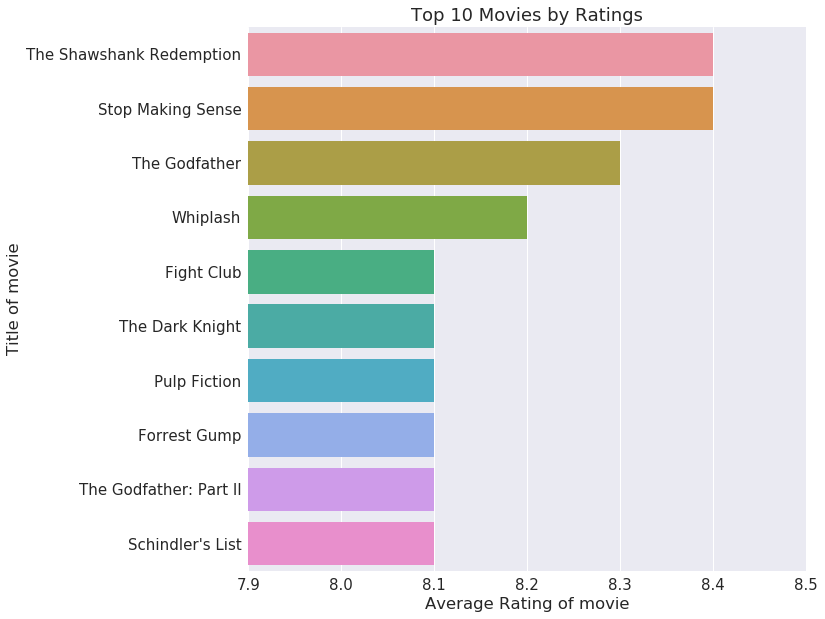

In [60]:
#Plot the top 10 movies
sns.set(font_scale=1.5);
f, ax = plt.subplots(figsize=(10, 10));
ax = sns.barplot(x='vote_average', y='original_title', data=voters_top10);

ax.set(xlim=(7.9,8.5), ylabel="Title of movie", xlabel="Average Rating of movie");
plt.title('Top 10 Movies by Ratings');

### we have two movies got same Rating , The shawshank redemption and stop making sense


## Question 2: Which year has the highest number of movie released?


In [61]:
 # Group by year then count the number of movies.
year_movie = df.groupby('release_year')['original_title'].count()
year_movie.head()

release_year
1960    4
1961    9
1962    7
1963    6
1964    7
Name: original_title, dtype: int64

In [62]:
#shows the year with the highest movie released
year_movie.idxmax()

2011

In [63]:
 #shows the year with the lowest movie released
year_movie.idxmin()

1960

In [64]:
#shows the number of movies produced in year 2011 
year_movie[2011]

178

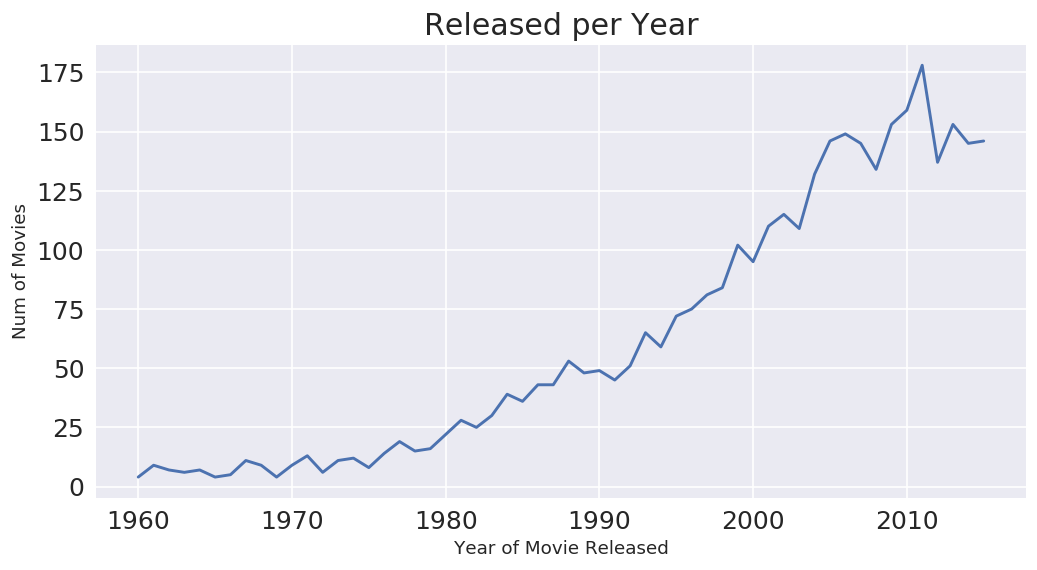

In [65]:
# Figure size(width, height)
plt.figure(figsize=(10,5), dpi = 120)

# x-axis
plt.xlabel('Year of Movie Released', fontsize = 11)
# y-axis
plt.ylabel('Num of Movies', fontsize = 11)
# Title
plt.title('Released per Year')

# Plot Line chart
plt.plot(year_movie)

# Display plot
plt.show()

 
### The above plot shows there is a yearly increase in movie produced, with year 2011 showing the highest movie produced. And after 2011 there was a significant drop in movie produced.

<a id='conclusions'></a>
## Conclusions

1- I checked the yearly trend in movie production, and noticely a yearly increase in the trend. It also featured year 2011 which is the year with the highest number of movie released with 178 movies produced. While year 1960 had the lowest.

2- The movie'The Shawshank Redemption' and 'stop making sense' had a whooping 8.4 rating by voters making it the highest rated movie. It was really liked by people who watched it.

## Submitting your Project 

In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0